# Praktikum 5

## Import Library

In [1]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

## Ekstrasi Data Gambar

In [2]:
# Image directories
train_dir = "images/training/"
test_dir = "images/test/"

## Membuatlah fungsi untuk membuat daftar seluruh path dari gambar.

In [36]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        if dir.is_dir():
            # Only store folder name (day/night), not full path
            label = dir.name
            print(f"Loading images from: {label}")
            for file in dir.glob('*.jpg'):
                img = mpimg.imread(file)

                if not img is None:
                    img_list.append((img, label))
    
    print(f"Total images loaded: {len(img_list)}")
    return img_list

## Load Gambar Training

In [37]:
# Load training data
train_img = load_dataset(train_dir)

Loading images from: day
Loading images from: night
Loading images from: night
Total images loaded: 240
Total images loaded: 240


In [38]:
# Quick check: what labels do we have?
print("First 5 labels:", [item[1] for item in train_img[:5]])
print("Last 5 labels:", [item[1] for item in train_img[-5:]])
print("Unique labels:", set([item[1] for item in train_img]))

First 5 labels: ['day', 'day', 'day', 'day', 'day']
Last 5 labels: ['night', 'night', 'night', 'night', 'night']
Unique labels: {'night', 'day'}


## Melakukan Pengecekan pada salah satu data pada list.

In [5]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [176, 209, 228],
         [177, 210, 229],
         [177, 210, 229]],
 
        [[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [180, 213, 232],
         [180, 213, 232],
         [180, 213, 232]],
 
        [[158, 194, 218],
         [158, 194, 218],
         [158, 194, 218],
         ...,
         [177, 210, 229],
         [177, 210, 229],
         [177, 210, 229]],
 
        ...,
 
        [[ 35,  40,  43],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 65,  73,  75],
         [ 65,  73,  75],
         [ 65,  73,  75]],
 
        [[ 36,  41,  44],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 68,  76,  78],
         [ 68,  76,  78],
         [ 65,  73,  75]],
 
        [[ 37,  41,  44],
         [ 38,  43,  46],
         [ 39,  44,  47],
         ...,
         [ 68,  76,  78],
  

## Mengecek Ukuran Gambar Secara Acak

In [6]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 230
(593, 800, 3)


## Menampilkan gambar untuk inspeksi secara visual.

In [7]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

## Visualisasi Gambar secara acak

Shape	: (614, 857, 3)
Label	: images\training\night


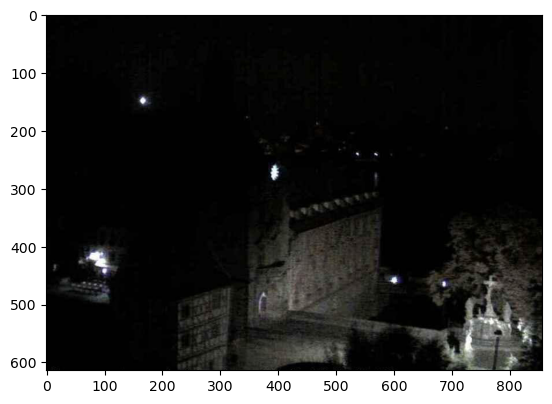

In [8]:
random_img_viz(train_img)

## Pra Pengolahan Data

Membuat fungsi untuk menstandarkan ukuran gambar.

In [9]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

Membuat fungsi untuk kebutuhan encoding label

In [10]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1
    
    return num_val

Membuat fungsi untuk menjalankan 2 fungsi yang telah dibuat secara bersamaan

In [11]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))
    
    return std_img_list

Melakukan Pra Pengolahan data pada data training.

In [39]:
train_std_img_list = preprocess(train_img)

Melakukan Pengecekan ukuran gambar secara acak

In [13]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 52
(600, 1100, 3)


Inspeksi Visual

Shape	: (600, 1100, 3)
Label	: 0


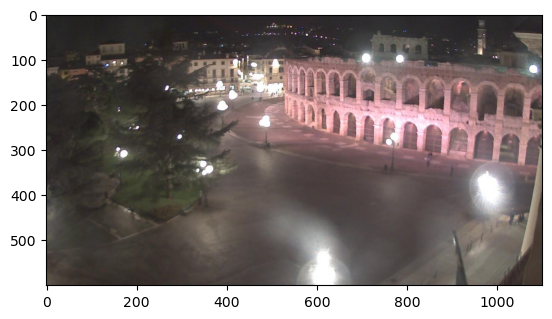

In [14]:
random_img_viz(train_std_img_list)

## Ekstraksi Fitur

Membuat fungsi berikut mendapatkan nilai rata-rata tingkat kecerahan

In [15]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Melakukan pengecekan pada gambar secara acak. 

Image 3
Avg Brighness: 199.7848


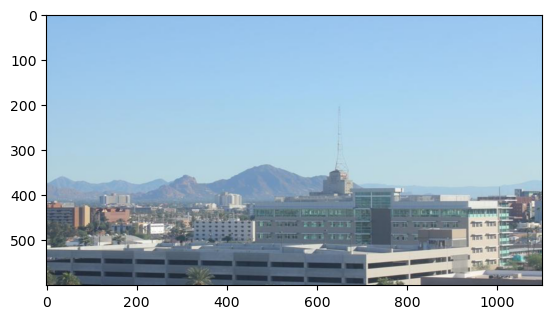

In [16]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

## Klasifikasi dengan Metode Treshold

In [17]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1
    
    return pred

Melakukan pengecekan prediksi secara acak pada data training

Image 24
Actual label: 0
Predicted label: 0


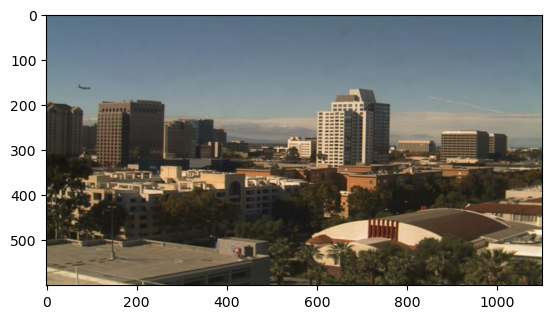

In [18]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

## Evaluasi Manual

In [19]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))
    
    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

Melakukan Evaluasi pada data training dengan nilai ambang batas 120

In [20]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.6583


Evaluasi pada data testing

In [21]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.6062


## Alternatif - Membuat Feature Vectors

In [23]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)
    
    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

Cek hasil pada data training

In [40]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,175.129871,1.0
1,192.954773,1.0
2,132.141432,1.0
3,199.784797,1.0
4,109.964702,1.0


In [41]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,194.267453,0.0
1,157.844245,0.0
2,201.646592,0.0
3,191.273192,0.0
4,188.152729,0.0


## Membuat model SVM

In [42]:
# import requied library
from sklearn.svm import SVC

# Split data and label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1].astype(int)  # Convert to integer
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1].astype(int)  # Convert to integer

# Check unique classes
print(f'Unique classes in y_train: {y_train.unique()}')
print(f'Class distribution:\n{y_train.value_counts()}')

model = SVC()
model.fit(X_train, y_train)

Unique classes in y_train: [1 0]
Class distribution:
LABELS
1    120
0    120
Name: count, dtype: int64


SVC()

## Evaluasi 

In [43]:
from sklearn.metrics import accuracy_score

# Make a prediction on train data
y_train_pred = model.predict(X_train)

# Get the accuracy on train data
acc_train = accuracy_score(y_train, y_train_pred)

# Make a prediction on test data
y_test_pred = model.predict(X_test)

# Get the accuracy on test data
acc_test = accuracy_score(y_test, y_test_pred)

# Print Eval Result
print(f'Accuracy on train: {acc_train}')
print(f'Accuracy on test: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.525
